In [1]:
#data loading
import pandas as pd
filename="/content/infert.csv"
a=pd.read_csv(str(filename))

print(a)

     rownames education  age  parity  induced  case  spontaneous  stratum  \
0           1    0-5yrs   26       6        1     1            2        1   
1           2    0-5yrs   42       1        1     1            0        2   
2           3    0-5yrs   39       6        2     1            0        3   
3           4    0-5yrs   34       4        2     1            0        4   
4           5   6-11yrs   35       3        1     1            1        5   
..        ...       ...  ...     ...      ...   ...          ...      ...   
243       244   12+ yrs   31       1        0     0            1       79   
244       245   12+ yrs   34       1        0     0            0       80   
245       246   12+ yrs   35       2        2     0            0       81   
246       247   12+ yrs   29       1        0     0            1       82   
247       248   12+ yrs   23       1        0     0            1       83   

     pooled.stratum  
0                 3  
1                 1  
2        

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
education,0
age,0
parity,0
induced,0
case,0
spontaneous,0
stratum,0
pooled.stratum,0


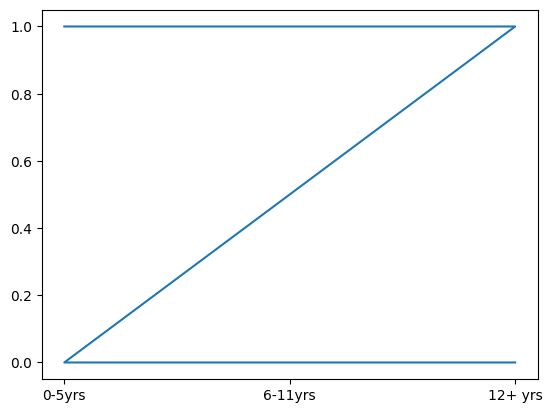

In [3]:
from matplotlib import pyplot as plt
target="case"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 248 artists>

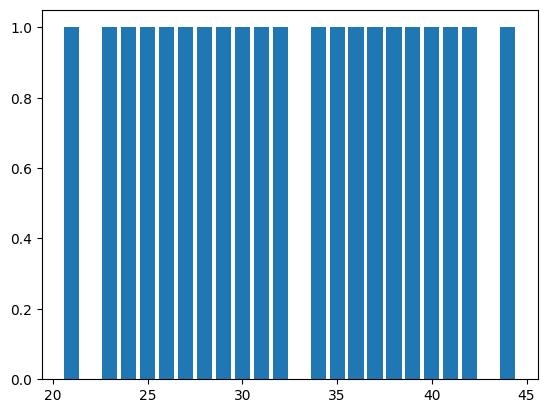

In [4]:
plt.bar(a[a.columns[2]],a[str(target)])

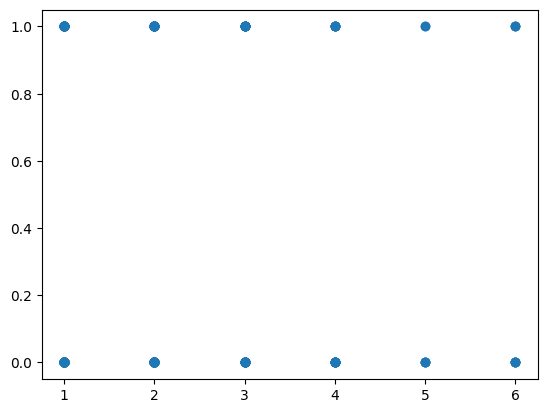

In [5]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

     rownames  education  age  parity  induced  case  spontaneous  stratum  \
0           1          0   26       6        1     1            2        1   
1           2          0   42       1        1     1            0        2   
2           3          0   39       6        2     1            0        3   
3           4          0   34       4        2     1            0        4   
4           5          2   35       3        1     1            1        5   
..        ...        ...  ...     ...      ...   ...          ...      ...   
243       244          1   31       1        0     0            1       79   
244       245          1   34       1        0     0            0       80   
245       246          1   35       2        2     0            0       81   
246       247          1   29       1        0     0            1       82   
247       248          1   23       1        0     0            1       83   

     pooled.stratum  
0                 3  
1                 1

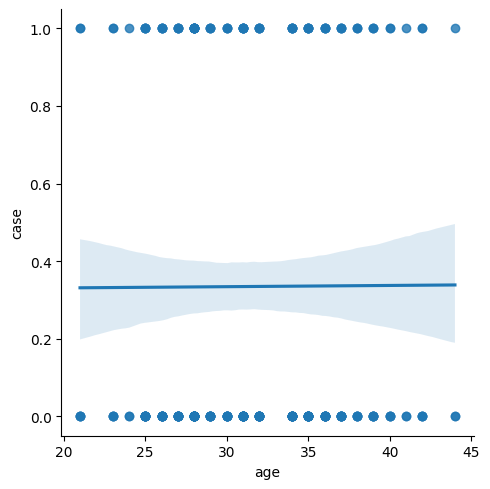

In [7]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='case', ylabel='case'>

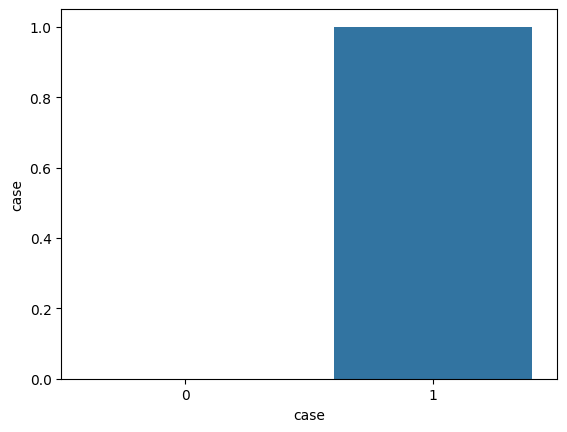

In [8]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='education', ylabel='case'>

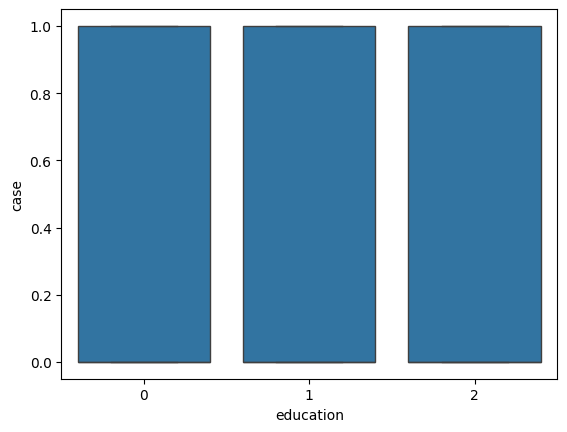

In [9]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-10-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='case', ylabel='Density'>

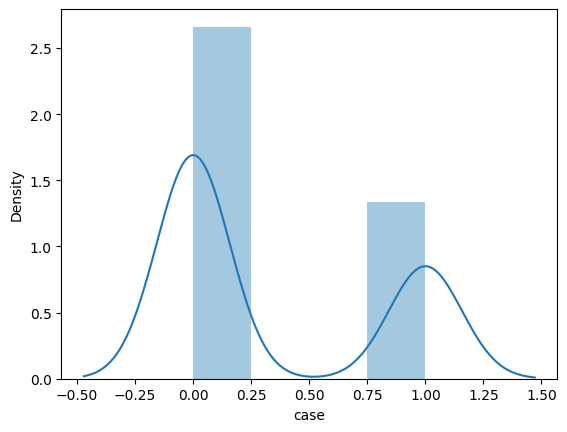

In [10]:
sns.distplot(a[str(target)])

<Axes: xlabel='education', ylabel='Density'>

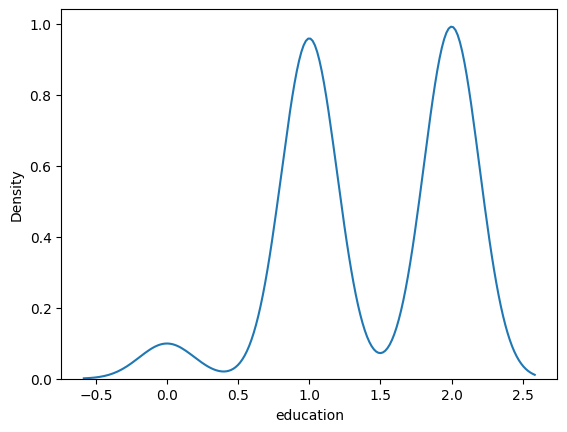

In [11]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='induced', ylabel='count'>

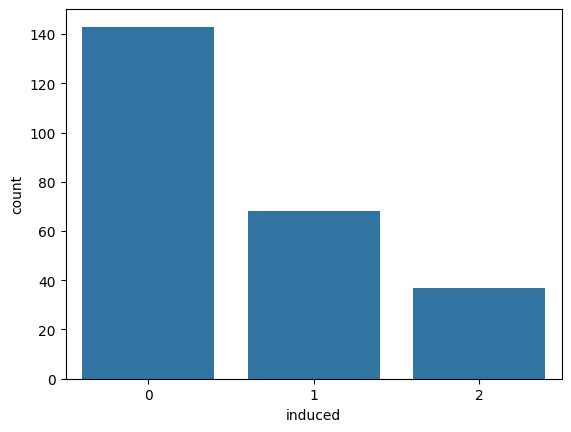

In [12]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

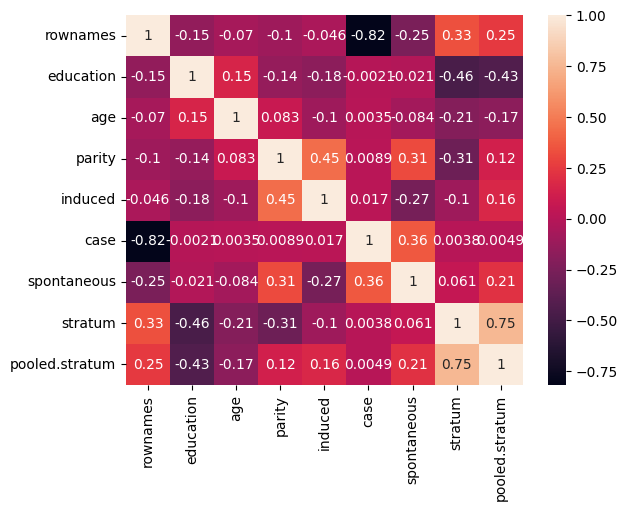

In [13]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

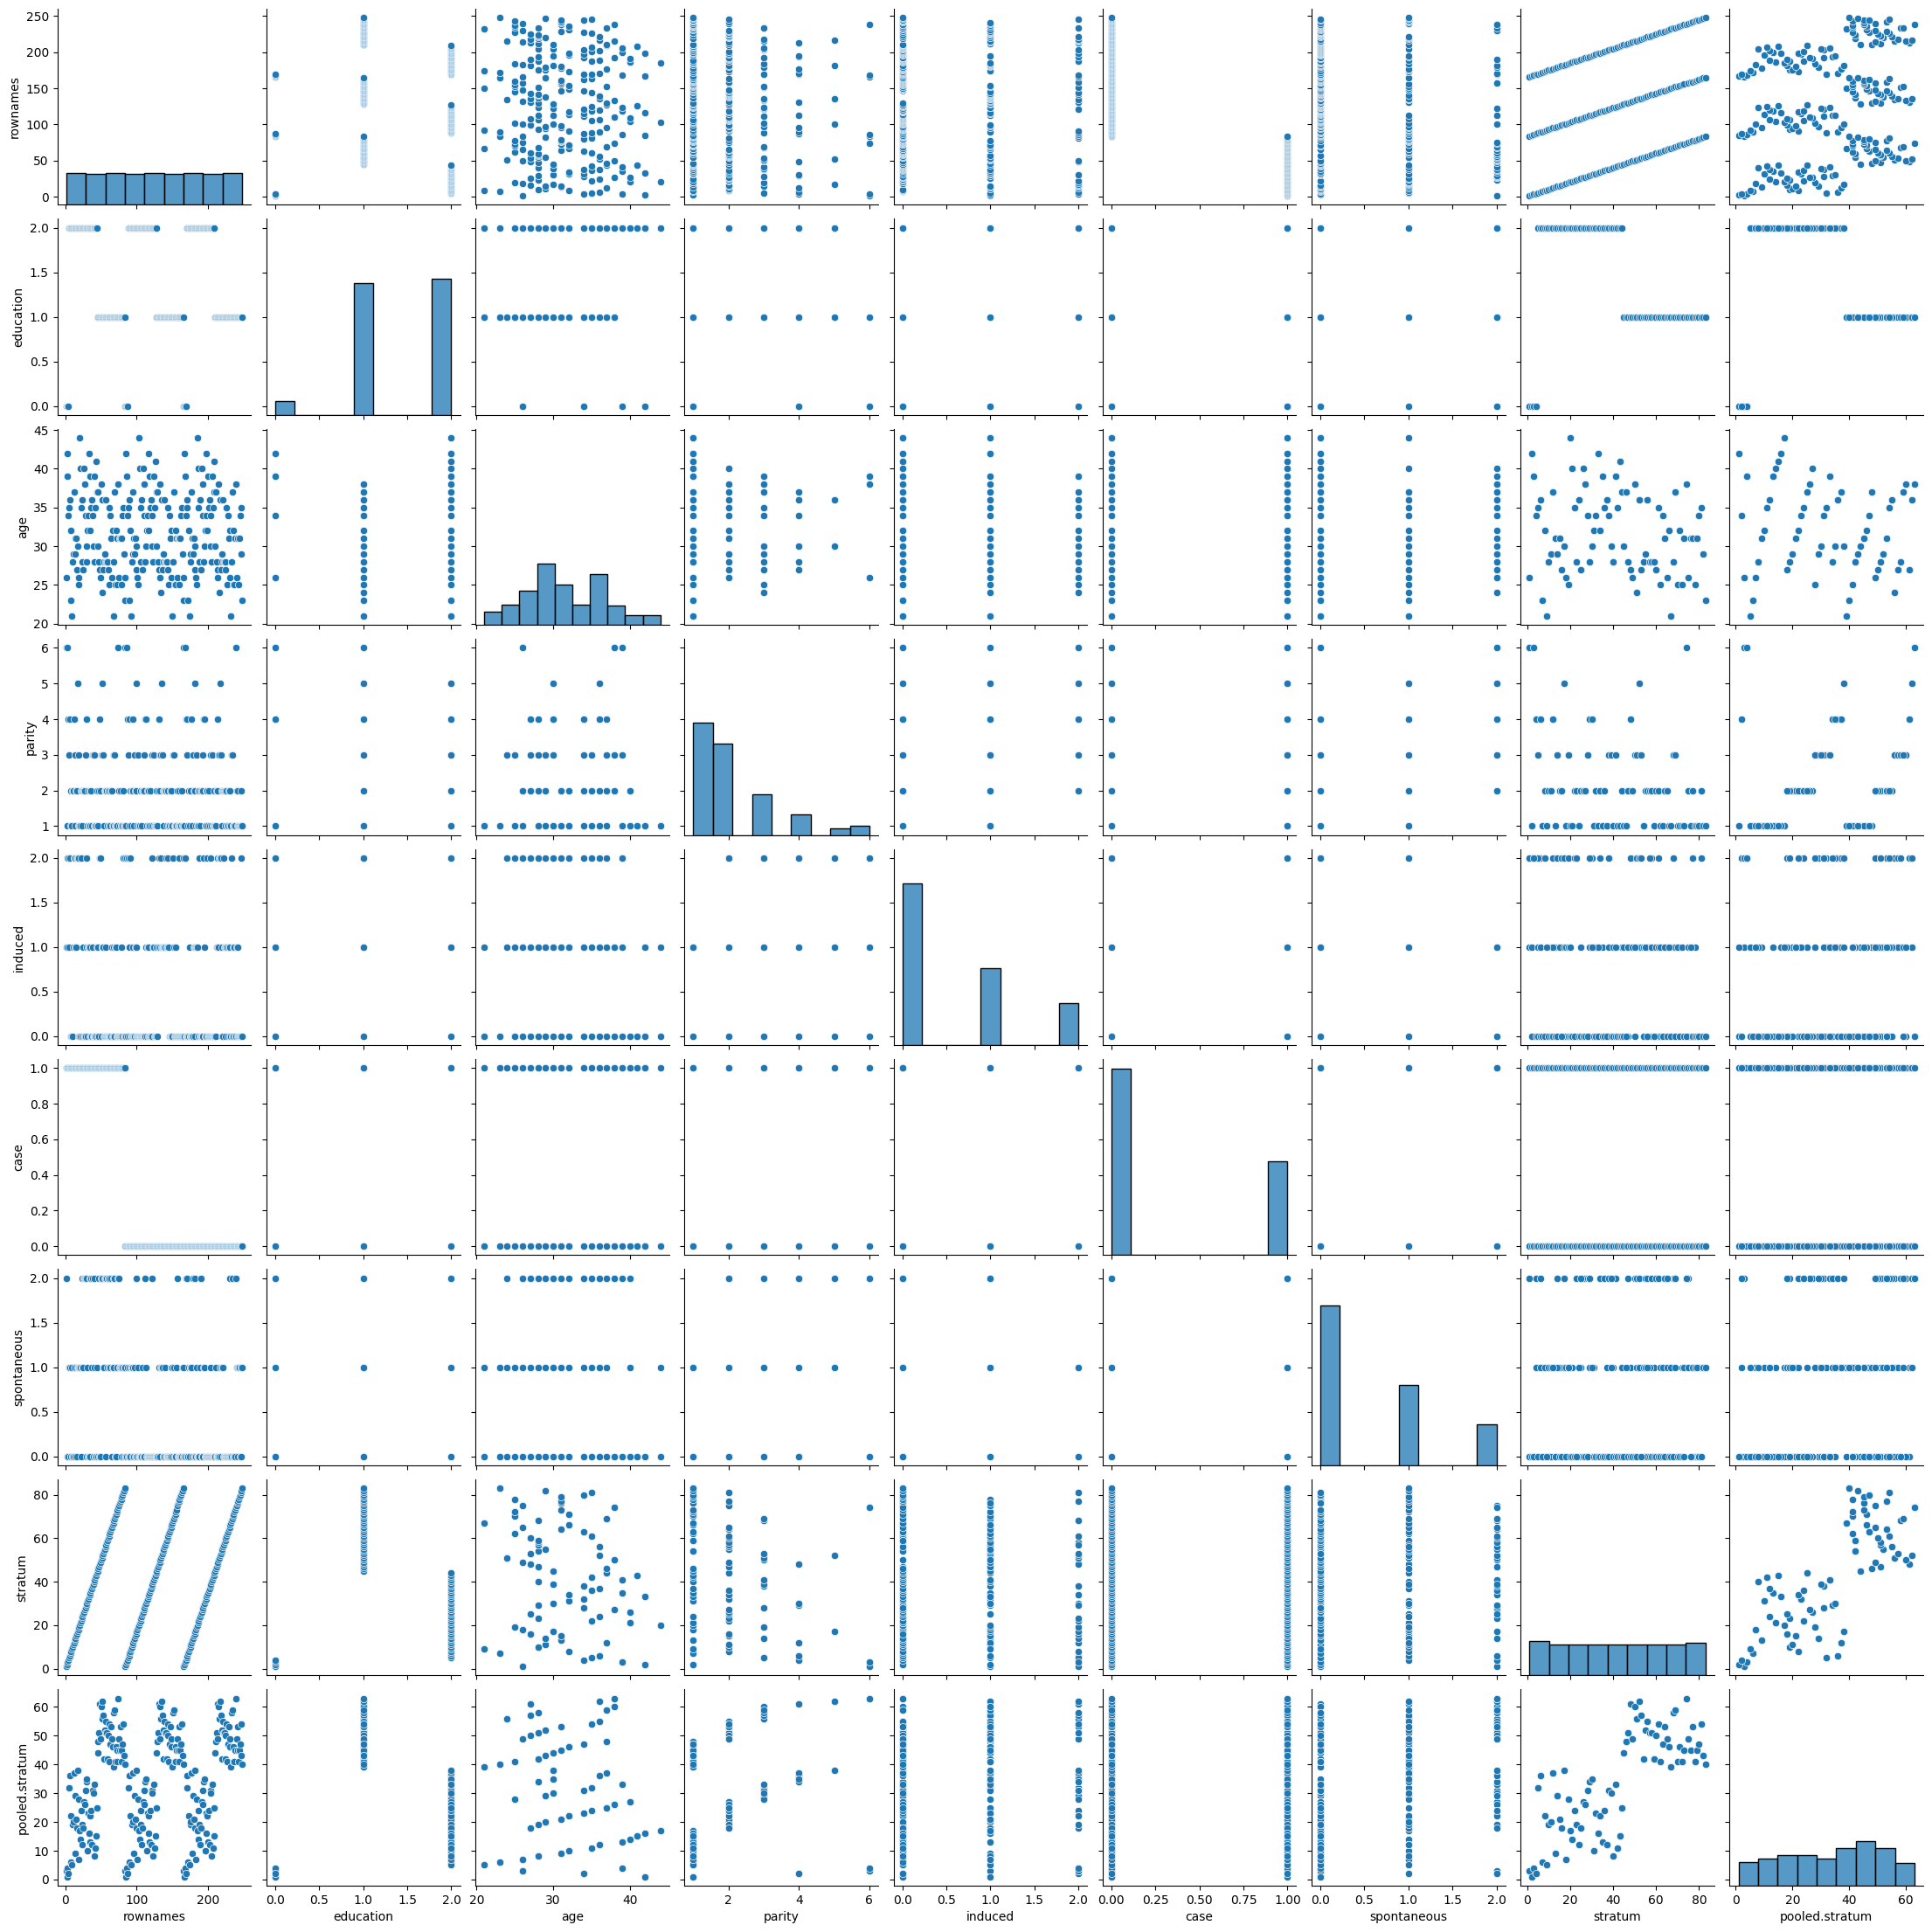

In [14]:
sns.pairplot(data=a)

In [16]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

     rownames  education  age  parity  induced  spontaneous  stratum  \
0           1          0   26       6        1            2        1   
1           2          0   42       1        1            0        2   
2           3          0   39       6        2            0        3   
3           4          0   34       4        2            0        4   
4           5          2   35       3        1            1        5   
..        ...        ...  ...     ...      ...          ...      ...   
243       244          1   31       1        0            1       79   
244       245          1   34       1        0            0       80   
245       246          1   35       2        2            0       81   
246       247          1   29       1        0            1       82   
247       248          1   23       1        0            1       83   

     pooled.stratum  
0                 3  
1                 1  
2                 4  
3                 2  
4                32  
.. 

In [17]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
243    0
244    0
245    0
246    0
247    0
Name: case, Length: 248, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
print(x_train)

     rownames  education  age  parity  induced  spontaneous  stratum  \
241       242          1   31       2        0            1       77   
188       189          2   36       1        0            1       24   
247       248          1   23       1        0            1       83   
157       158          1   31       1        0            0       76   
227       228          1   34       1        0            0       63   
..        ...        ...  ...     ...      ...          ...      ...   
74         75          1   26       2        0            2       75   
108       109          2   40       2        0            0       26   
96         97          2   29       3        0            1       14   
148       149          1   32       1        0            0       66   
68         69          1   37       3        0            2       69   

     pooled.stratum  
241              53  
188              12  
247              40  
157              45  
227              47  
.. 

In [20]:
print(y_train)

241    0
188    0
247    0
157    0
227    0
      ..
74     1
108    0
96     0
148    0
68     1
Name: case, Length: 198, dtype: int64


In [21]:
print(x_test)

     rownames  education  age  parity  induced  spontaneous  stratum  \
95         96          2   31       1        0            0       13   
136       137          1   28       1        1            0       54   
76         77          1   31       2        0            1       77   
70         71          1   32       1        1            0       71   
224       225          1   27       2        1            0       60   
233       234          1   37       3        0            2       69   
100       101          2   26       1        0            0       18   
173       174          2   21       1        1            0        9   
92         93          2   28       2        0            1       10   
5           6          2   36       4        2            1        6   
176       177          2   37       4        0            1       12   
217       218          1   27       3        2            0       53   
121       122          2   30       3        0            2     

In [22]:
print(y_test)

95     0
136    0
76     1
70     1
224    0
233    0
100    0
173    0
92     0
5      1
176    0
217    0
121    0
235    0
210    0
122    0
149    0
161    0
24     1
19     1
61     1
105    0
36     1
73     1
213    0
88     0
182    0
155    0
13     1
34     1
118    0
172    0
58     1
82     1
55     1
218    0
140    0
237    0
77     1
181    0
67     1
2      1
212    0
144    0
94     0
126    0
65     1
83     0
1      1
14     1
Name: case, dtype: int64


In [23]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [24]:
print(ypred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 0 1 1]


In [25]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

1.0


In [26]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[31  0]
 [ 0 19]]


In [27]:
print(model.predict([[96,2,31,1,0,0,13,9]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [29]:
print(ypred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 0 1 1]


In [30]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

1.0


In [31]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[31  0]
 [ 0 19]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [33]:
print(model.predict([[96,2,31,1,0,0,13,9]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [36]:
print(ypred)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 0 1 1]


In [37]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

1.0


In [38]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[31  0]
 [ 0 19]]


In [39]:
print(model.predict([[96,2,31,1,0,0,13,9]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

